In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path="10-dataset.csv"
tips=pd.read_csv(file_path)
X=tips["total_bill"].values
y=tips["tip"].values

In [3]:
def local_weight(x_query,X,y,tau):
    m=len(X)
    weights=np.exp(-((X-x_query)**2)/(2*tau**2))
    X_b=np.c_[np.ones(m),X]
    W=np.diag(weights)
    theta=np.linalg.pinv(X_b.T@W@X_b)@(X_b.T@W@y)
    x_query_b=np.array([1,x_query])
    return x_query_b @ theta

In [8]:
tau=10
x_query=30
predicted_tip=local_weight(x_query,X,y,tau)
print(f"predicted tip for total bill of $30:{predicted_tip:.2f}")
X_range=np.linspace(X.min(),X.max(),100)
y_pred=np.array([local_weight(x,X,y,tau) for x in X_range])

predicted tip for total bill of $30:3.99


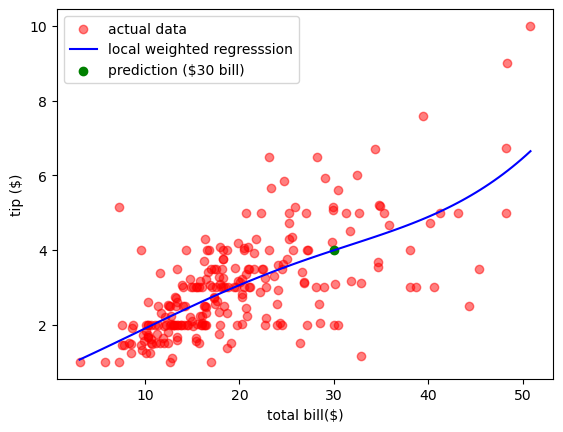

In [9]:
plt.scatter(X,y,color='red',alpha=0.5,label="actual data")
plt.plot(X_range,y_pred,color='blue',label="local weighted regresssion")
plt.scatter([x_query],[predicted_tip],color='green',marker='o',label="prediction ($30 bill)")
plt.xlabel("total bill($)")
plt.ylabel("tip ($)")
plt.legend()
plt.show()